## DS 3000 - Predicting the selling price of car - Team 15

**Student Name**: [Yi Chen Wu, Jingkai Wang, Xiaoli Fang, Qixiang Jiang]

**Date**: [4.19.2023]


#### Perform any necessary data preparation steps and EDA.

In [1]:
# improt all the library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_spli
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressorfrom sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
sns.set_style('darkgrid')


In [2]:
# load our car data set 
df=pd.read_csv("car_data.csv")

# printing the first 5 rows 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# looking the shape of the dataset
df.shape


(301, 9)

In [4]:
# Use describe function to get more infomrmation
df.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
# drop all NaN of the dataset
df.dropna(inplace=True)


In [6]:
# Check again for missing values
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Check the data types of the variables
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [8]:
# change the data type of the original dataset
df['Fuel_Type']  = df['Fuel_Type'].astype('string')
df['Seller_Type']  = df['Seller_Type'].astype('string')
df['Transmission']  = df['Transmission'].astype('string')
df = df.drop('Car_Name', axis=1)


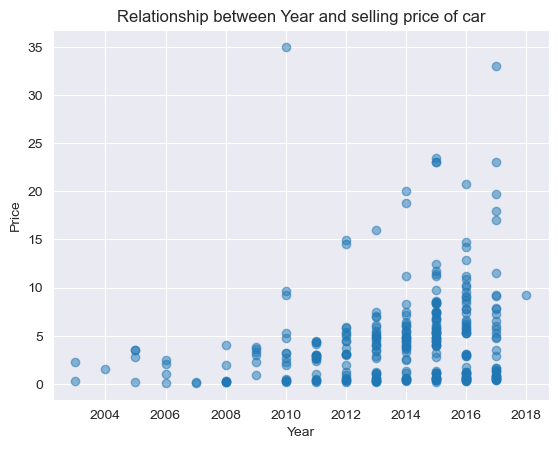

In [9]:
# Visualize the relationship between the Year of the car and it's selling price 
plt.scatter(df['Year'], df['Selling_Price'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Relationship between Year and selling price of car')
plt.show()


In [10]:
# Selecting the required features from the data set 
X = df[['Year','Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y = df['Selling_Price']
categorical_feature = ['Fuel_Type', 'Seller_Type', 'Transmission']

# encoding it 
X = pd.get_dummies(X)



In [11]:
# show out all the data types
df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         string
Seller_Type       string
Transmission      string
Owner              int64
dtype: object

### Multi-variables linear regression

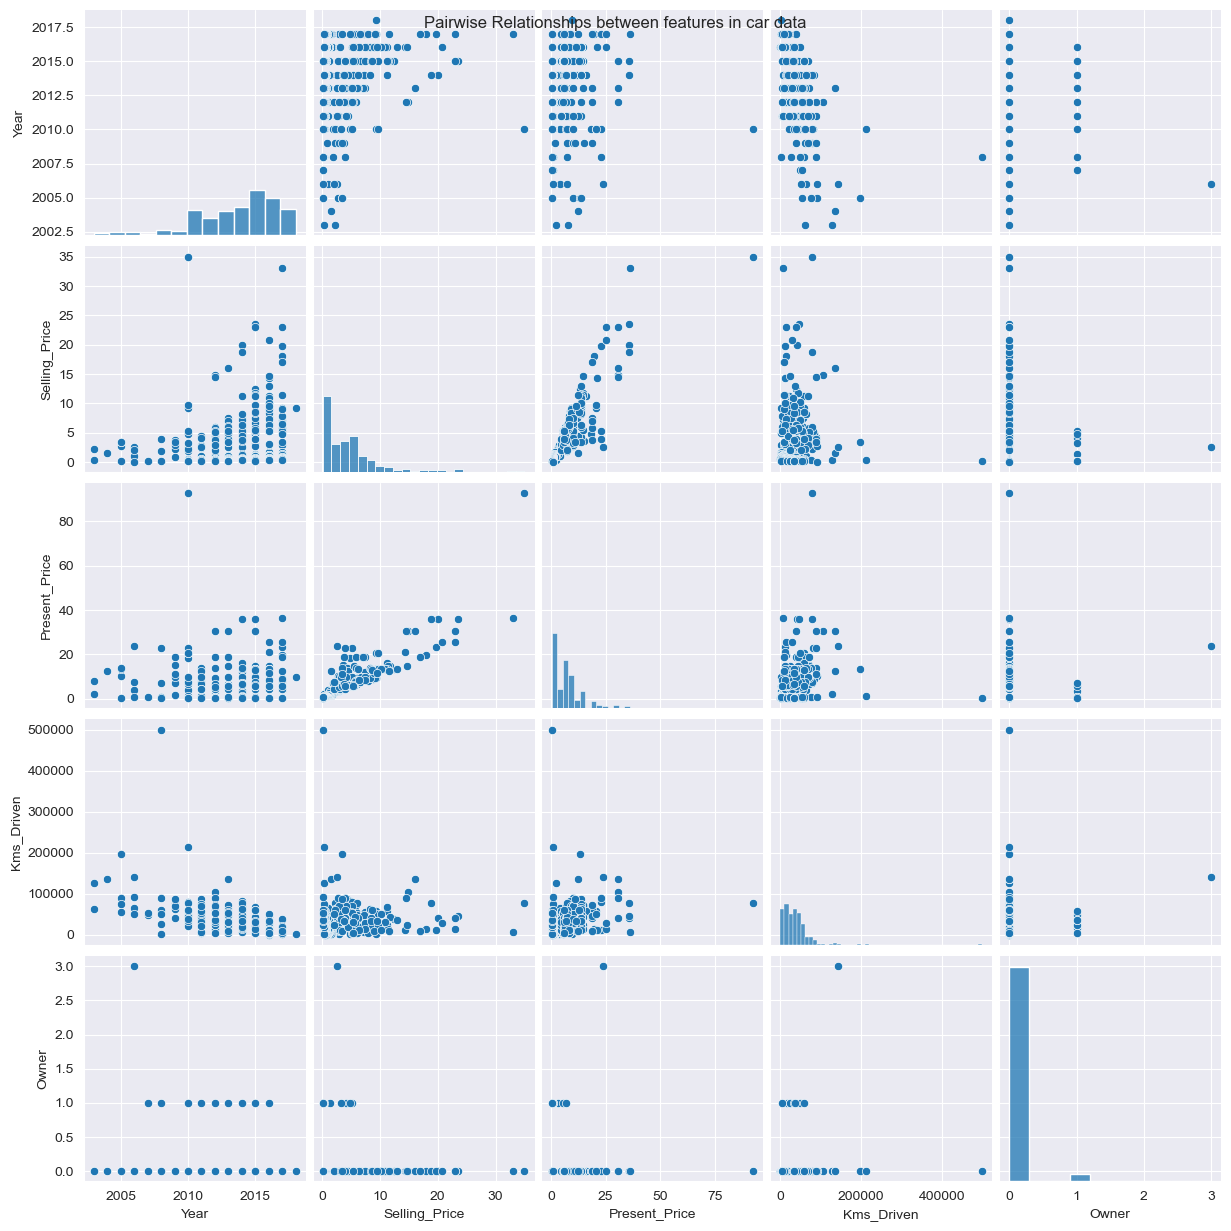

In [12]:

# create scatter plot matrix
vis = sns.pairplot(df)
vis.fig.suptitle('Pairwise Relationships between features in car data')
plt.show()

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=7)

# Create a linear regression model and train it
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model using R-squared
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 7.447762230679298


### Adding Cross validation to DecisionTreeRegressor

In [14]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Training a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)


# Performing cross-validation on the training set
scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Printing the mean squared error for each fold
print('Mean squared error for each fold: ', np.abs(scores))

# Printing the average mean squared error
print('Average mean squared error: ', np.mean(np.abs(scores)))


Mean squared error for each fold:  [3.16215714 3.89609762 3.61737143 0.80227143 2.55527381]
Average mean squared error:  2.806634285714286


### Adding cross validation and find the best n_estimator for Random Forest regressor

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=7)

# Create a RandomForestRegressor model with default parameters
rf = RandomForestRegressor(random_state=7)

# Use cross-validation to find the best value for n_estimators
# Then, define a custom scoring function based on MSE
def custom_scoring_function(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return -mse  # negative MSE to maximize instead of minimize

param_dist = {'n_estimators': sp_randint(100, 1000),
              'max_depth': sp_randint(5, 20),
              'min_samples_split': sp_randint(2, 10),
              'min_samples_leaf': sp_randint(1, 4),
              'max_features': ['sqrt', 'log2']}

# Use random search with 10 iterations and parallel processing
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                                   n_iter=10, cv=3, scoring=make_scorer(custom_scoring_function), 
                                   n_jobs=-1, random_state=7)
random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {-random_search.best_score_}")  # undo negative sign in scoring function

# Fit the model with the best value for n_estimators
best_rf = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R^2: {r2_score(y_test, y_pred)}")


Best parameters: {'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 498}
Best score: 2.5191574609416496
MAE: 1.0140650949500933
MSE: 7.025419045692582
R^2: 0.7404256609152728


### The MSE is find due to the max selling price is aroung 45 and the mean is 4.661296 so it is fine to have a higher MSE value. 


In [16]:
# Showing the most important features 
dt = RandomForestRegressor(max_depth =  12, 
                           max_features = 'log2',
                           min_samples_leaf= 1, 
                           min_samples_split = 3, 
                           n_estimators = 498)
dt.fit(X_train, y_train)

df = dt.predict(X_test)

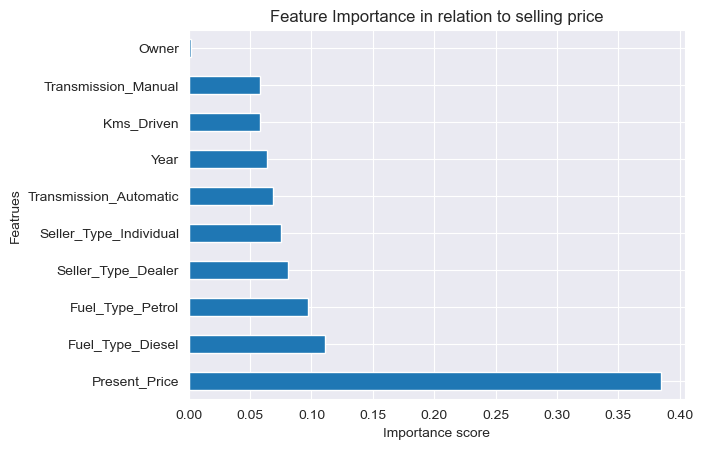

In [17]:
# creating a vizualization for the importance of eahc features.
feature_importances = pd.Series(dt.feature_importances_, index = X.columns )
feature_importances.nlargest(10).plot(kind='barh')

# showing the graph
plt.title('Feature Importance in relation to selling price')
plt.xlabel('Importance score')
plt.ylabel('Featrues')
plt.show()



### The most important feature that affect the selling price of the car is the present price.

### KNN Regressor VS MSE

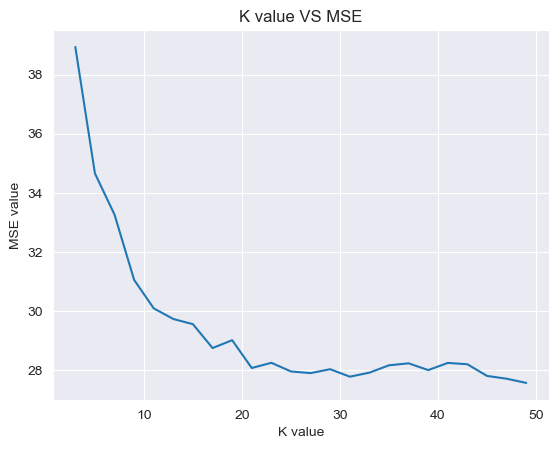

In [18]:
# identify a suitable value of k and create an empty library
predictions = {}

for k in range(3, 50, 2): #increment k by 2
    knn = KNeighborsRegressor(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    predictions[k] = mean_squared_error(y_test, y_pred_knn)

# making the line plot
sns.lineplot(x=predictions.keys(), y=predictions.values())

# setting the labels 
plt.title('K value VS MSE')
plt.xlabel('K value')
plt.ylabel('MSE value')
plt.show()  


In [19]:
 #As the KNN neighbor increase the mean squar error decreases the optimal K value is around 20 